In [1]:
%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set(color_codes=True)

from string import punctuation
import re

In [2]:
rev = pd.read_csv('amozon.csv',engine='python',index_col=False)
rev.head()
rev[['manufacturer', 'reviews.title','reviews.text','reviews.rating','reviews.username']]

,manufacturer,reviews.title,reviews.text,reviews.rating,reviews.username
0,Amazon,Kindle,This product so far has not disappointed. My c...,5.0,Adapter
1,Amazon,very fast,great for beginner or experienced person. Boug...,5.0,truman
2,Amazon,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,DaveZ
3,Amazon,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,Shacks
4,Amazon,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,explore42
...,...,...,...,...,...
34655,"Amazon Digital Services, Inc",Not appreciably faster than any other 1.8A cha...,This is not appreciably faster than any other ...,3.0,Kris
34656,"Amazon Digital Services, Inc",Should be included,Amazon should include this charger with the Ki...,1.0,Jonathan Stewart
34657,"Amazon Digital Services, Inc",Disappointing Charger,Love my Kindle Fire but I am really disappoint...,1.0,J Lawson
34658,"Amazon Digital Services, Inc",Not worth the money,I was surprised to find it did not come with a...,1.0,Just the Buyer


In [3]:
list_of_reviews=rev['reviews.text'].to_list()

In [4]:
result =['This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person. Bought as a gift and she loves it',
 'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.",
 'I bought this for my grand daughter when she comes over to visit. I set it up with her as the user, entered her age and name and now Amazon makes sure that she only accesses sites and content that are appropriate to her age. Simple to do and she loves the capabilities. I also bought and installed a 64gig SD card which gives this little tablet plenty of storage. For the price I think this tablet is best one out there. You can spend hundreds of dollars more for additional speed and capacity but when it comes to the basics this tablets does everything that most people will ever need at a fraction of the cost.',
 'This amazon fire 8 inch tablet is the perfect size. I purchased it for my husband so that he has a bigger screen than just his phone. He had gotten me one a few years ago so I knew it would be a good purchase.',
 'Great for e-reading on the go, nice and light weight, and for the price point given, definitely worth the purchase.',
 'I gave this as a Christmas gift to my inlaws, husband and uncle. They loved it and how easy they are to use with fantastic features!',
 'Great as a device to read books. I like that it links with my borrowed library e-books. Switched from another popular tablet brand and I am happy with the choice I made. It took some time to get books from my previous non-Kindle reader, but finally figured out a way!',
 'I love ordering books and reading them with the reader.',
 'Not easy for elderly users cease of ads that pop up.',
 'Excellent product. Easy to use, large screen makes watching movies and reading easier.',
 'Wanted my father to have his first tablet and this is a very good value. He can watch movies and play a few games. Easy enough for him to use.',
 'Simply does everything I need. Thank youAnd silk works wonders',
 'Got it as a present and love the size of the screen',
 'The kindle is easiest to use, graphics and screen crisp, clear, brilliant colors.',
 'nice reader. almost perfect for what i want/need. good bargain',
 'I really like this tablet. I would have given 5 stars but sometimes you have to push start several times after you unlock the screen and it is a little annoying.',
 'Great video quality lots of fun apps fun for the whole family',
 'Love love love my kindle fire 8.....this is what my 9 yr old granddaughter said when I bought this for her at Christmas..we have purchased kindled in the past but this one has been the best....love the fact that you can now use a memory card in it...that helps so much when you use it for books...games...music and viedos...thanks',
 'Excellent tablet with nice screen. I wish Amazon would pre install the play store, this would have been perfect.',
 'Preloaded with the reading app from Kindle but expandable with other apps. Perfect for travel. Carry your library, games and productivity apps in a small footprint.',
 'Very happy with this product and easy to use..picture is clear, takes great pictures..',
 'My grandchildren are home schooled and utilize the tables for many learning apps! They LOVE using them as it makes them feel "so grown up"! The tablets are a great leaning tool and they are receiving many benefits from them!',
 'Great size, easy to carry for traveling. Need to spend more time Looking into apps for contact manegement, interactive calenders and most important, music storage and use.',
 'I purchased this when my last tablet died. It meets all basic needs and the price was great.',
 'Perfect for downloading and reading books !! Perfect size and has a nice, bright screen.',
 "I was surprised when I learned of the capabilities of this device. Now my husband has more access to his desktop and I am doing things which I couldn't on his device.",
 'I got it for my son. Its user friendly and durable.',
 'The visual quality on the Fire 8 HD is amazing. It runs very fast and is easy to use, very durable.',
 'If your looking for a affordable gift this is it!.',
 'This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.',
 'Works great. Love the portability of books. Overall great product',
 'I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.',
 'Just the right size for reading books and playing some games.',
 "I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!",
 'Overall a nice product for traveling purposes Value for money',
 'My children love this table great quality of pictures, excellent camera',
 'I bought 3 tablets and my family was not disappointed.',
 'Great tablet fast screen good size never gives me problem',
 'Bought this for my 87 year old grandmother who wanted to be able to play games and read books from the library. My aunt lives with her and can help her use it so its perfect for that type of user. After playing with It, I would consider it for just about anyone other than a hardcore user that wants the latest and greatest tech. if you are tech saavy, you can do more with these Fire tablets than advertised.',
 'This is exactly what the person wanted as a gift and she enjoys using it.',
 'Does all basic functions of a tablet. Hardcore users may want an iPad.',
 'Works great for a simple tablet. Not a huge fan of the silk browser but it could be worse! I am very happy with my purchase!',
 "It's fast and easy to use. This is my second kindle fire .",
 'More flexibility than a Kindle and bigger screen. Like it because I can surf the web and download and read books.',
 'For the money you cannot beat this tablet. Full of features, picture quality is great, and very fast speed while using the internet.',
 'Easy to use, solid build, sharp HP screen for movies. Who needs more?',
 'Tablet is perfect for beginners who just want basic',
 'this is my first tablet .. love it .. actually read my first e-book on it .. large screen, easy to read & play games .. fits nicely in my purse',
 'This 8 inch Fire is definitely better than the cheaper 7 inch. It works fine enough for teens to play games and watch movies.',
 'Great tablet for under $100. Does not have the highest specs, but gets the job done for lite tablet users.',
 'I purchased the kindle fire because I needed a entertainment only device for long flights. This device is the perfect size for travel and easy to use and set up with your Amazon account. It is worth purchasing a Fire tablet if you are an Amazon Prime member. If not, I would not recommend it because the available apps are limited . My only complaint about this device is that if it freezes it is difficult to reset.',
 'This fire tablet has long battery life. Reasonable fast',
 'Got this for my wife and she loves it. She had the previous generation and this one is a giant keep forward.',
 'Sleek packaging easy set up and great for anyone who wants a e reader with more to offer.',
 'Best and most affordable option of all the Kindle devices available.',
 'I did not want to get a new kindle but my old one would not charge or show a charge anymore. I could not depend on it for any length of time so I finally broke down and bought a new one. I am very happy with this one. I was afraid I would lose my music and photos since not all came from the Amazon store. However, everything I had on the old kindle transferred to the new one. I am still learning all about it but so far so good.',
 'My daughter likes this tablet to play her online games!',
 'Easy to figure out and used it extensively on my vacation.',
 "Excellent tablet to leave at my easel and display reference photos. It's light enough to velcro to a articulating stand (so I can position the tablet right next to my canvas). It's cheap enough to not worry about. I love it, for the price.",
 'I bought this wanting for books comics and movies and it has not disappoint ever since',
 'My 4 year old Grandson loves his Kindle. He had to have one after his sister got one.',
 'Easy to use. As a beginner I found this pad very good. Enjoy the kindle app.',
 'This Kindle does what I need it to do. The camera could be better but overall I am pretty happy with my purchase.',
 'Purchased this for my daughter to do more reading. It has so much more options for her if she wants.',
 'this is a great tablet for the price. my kid loves it ,does alot reading on it.',
 "I was really hoping that this would be faster than some other inexspensive tablets I've had. I mainly use it for email though and it does the job.",
 "Bought as a Christmas gift for someone. I bought iPad as well. Will update when it's used.",
 'Great tablet for the price. It is easy to navigate.',
 'I believe that this will be very useful during my husbands recovery from foot surgery.',
 'This is something that is useful if your looking for something to take along trips',
 'This is a wonderful device. I love the extra capabilities and apps.',
 'Decent tablet. Access to kindle and pretty much all your google apps.',
 'I am very happy with this tablet. The worst thing is that my steals it all the time. Lol',
 'A family member has vision problems. They had seen/used the Kindle of another family member - especially the ability to scale text. This device will make it possible to read, which she has had extreme difficulty doing.',
 'Easy setup and connect to WIFI. Great viewing area. Easy to read in bright places.',
 'I got this fire for my friend who wants to buy kindle..this serves both Kindle and Tab... very nice and very cheap..worth for what i paid.. I highly recommend this for beginners',
 'Really enjoyed the price value of this tablet versus ipad',
 'Amazing tablet with fast processor. It looks great... got good deal',
 'We got this for our 5 year old and this is really great for the price. Works like a charm!!',
 'I find it easy to use, but the kindle does not come with instructions, so you have to find your way around.',
 "I bought this because I was tired of watching Youtube and Twitch on my phone. Excellent display sound is decent-not great but you can always buy a speaker. The negatives are-it is definitely a fingerprint magnet, and the Spectrum TV app is AWFUL-the app works fine on my phone, but for some reason on this tablet it freezes and is unusable. All things considered, for 65 bucks it's hard to be beat.",
 "I love this tablet. The battery life last a long time. I use my Amazon Kindle Fire predominately for watching movies on Amazon Prime, Netflix's, and checking my emails. I also carry it to my appointments and meetings. It is a compact tablet, and not big and bulky. The playback of the movies are great, and the movies are HD. Great little tablet if you are looking for something to watch movies and checking emails. I would definitely recommend this tablet to friends and family members.",
 'My daughter loves this kindle, she does so much with it,well worth the money.',
 'Was looking for a tablet that was highly portable & could run my DIRECTTV app & stream videos. (Other electronics I have are much older versions). Salesman recommended this model to me based on personal experience. I am still learning all its functions but so far it seems easy to use & is doing what it promised to do.',
 'This is my second Fire, the other one is now retired. I like having HD. Works just fine.',
 "My wife bought this for me for my birthday. I enjoy reading biographys which usually have color photos. The regular Kindle make the pics black and white or they're aren't any. This allows me to see the color photos. I also love the night feature when I'm in bed reading. I no longer need a light on to read or need to hold a large book.",
 'Thanks to a knowledgeable, low-pressure salesperson, I was ready to buy my first tablet. This one was the right price (on sale) and I have not been disappointed. Every few days I learn more ways to use it besides checking e-mails & checking out library books & audio books. It stays charged for days, even with regular use. I recommend it as an inexpensive and very satisfactory alternative to more expensive tablets.',
 "It's a great tablet for the price. Don't expect it to be as fast more expensive ones. It's meant for casual use and it does a great job at that. For the price, you can't beat it. Get a nice large microsd card and you don't have to worry about space. It runs a little slow on certain things if you are multitasking but it's a simple tablet. I've run plenty of 720p videos without fail. It's great for ebooks or other files. Some more elaborate pdfs take a while to load if they have a lol of graphics. Battery life seems good for a small table too.The only real Issue I have is the Amazon App store being limited. It is an offshoot of Android but not all the same apps are available. There is a way around it but I wish they would just allow it access to Google Play or at least offer the same apps.So, it's a nice inexpensive table that works great. For the money, you will love it but don't get upset that is doesn't run as fast as a $500 tablet. That's not its job.",
 'Bought it for my 10 yr old granddaughter. Does everything she wants it to do in a tablet.',
 'Very easy to use tablet. Lots of apps and game available.',
 "We love the FreeTime settings for kids on the newer Kindle Fires. I was able to create a login for each of our kids as well as myself and set limits to the amount of device time they are allowed daily (can set to more for weekends if desired). You can set the age restrictions for content also, to avoid inappropriate ads, etc. Once you've downloaded apps, you can choose which ones you want each child to have access to in their profile settings, so if one child is older you can allow them access to something their younger siblings shouldn't have. Basically, I like that I can set their access rights and know they're safe so I don't have to continually monitor every moment. By the way, FreeTime kids settings are available without having to subscribe to their FreeTime app access plan. :)",
 'Great tablet, very clear picture. Would buy again.',
 'Good reader which is why I bought it. Ads are annoying.',
 "It's a mini computer packed in a handheld devise. Applications load quickly and I am able to get my work completed, while riding the commuter rail.",
 "Nice for a smaller tablet. It's good for Internet surfing.",
 'Purchased as a door prize gift given with a one year Amazon membership. The recipient loves it and says it performs very well. (As a past Amazon Fire user, now i-Pad graduate, I loved my Amazon Fire for more than 4 years without any problems. In fact, I just recycled it on to my son and it runs like a champ).'
 ]

In [5]:
# Check sentiment polarity of each sentence.
sentiment_scores = list()
i = 0
for sentence in result:
    line = TextBlob(sentence)
    sentiment_scores.append(line.sentiment.polarity)
    if(i <= 10):
        print(sentence + ": POLARITY=" + str(line.sentiment.polarity))
        i += 1

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.: POLARITY=0.325
great for beginner or experienced person. Bought as a gift and she loves it: POLARITY=0.8
Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...: POLARITY=0.6
I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.: POLARITY=

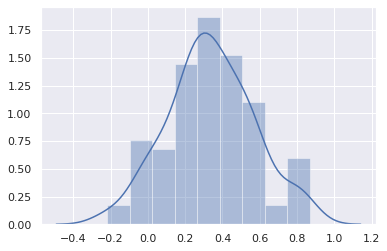

In [6]:
# Let's plot these sentiments!
sns.distplot(sentiment_scores)

In [7]:
comments = TextBlob(' '.join(result))

In [8]:
# Check out noun phrases, will be useful for frequent feature extraction
comments.noun_phrases

WordList(['monitor control', 'bought', 'inexpensive', 'nabi', 'skype', 'hd', 'great value.we', 'prime', 'shines', 'prime', 'nice look', 'bright infact', 'base model', 'insanely awesome', '7.7mm thick', 'smooth glossy', 'futuristic tab', 'ur hands', 'grand daughter', 'amazon', 'accesses sites', 'simple', 'sd', 'little tablet plenty', 'additional speed', 'amazon fire', 'inch tablet', 'perfect size', 'good purchase', 'light weight', 'price point', 'christmas', 'fantastic features', 'library e-books', 'switched', 'popular tablet brand', 'previous non-kindle reader', 'elderly users', 'excellent', 'easy', 'large screen', 'wanted', 'good value', 'easy', 'simply', 'thank', 'youand silk', 'got', 'screen crisp', 'brilliant colors', 'nice reader', 'good bargain', 'great video quality lots', 'fun apps fun', 'whole family', 'love', 'kindle fire', '... ..this', 'old granddaughter', 'christmas..we', '... .love', 'memory card', 'books ... games ... music', 'viedos ... thanks', 'excellent', 'nice scree

In [9]:
#compactness pruning:
cleaned = list()
for phrase in comments.noun_phrases:
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 2 or (not Word(word).definitions):
            count += 1
    # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.4:
        cleaned.append(phrase)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned)

After compactness pruning:
Feature Size:


233

In [10]:
for phrase in cleaned:    
    match = list()
    temp = list()
    word_match = list()
    for word in phrase.split():
        # Find common words among all phrases
        word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
        # If the size of matched phrases set is smaller than 30% of the cleaned phrases, 
        # then consider the phrase as non-redundant.
        if len(word_match) <= len(cleaned)*0.3 :
            temp.append(word)
            match += word_match
            
    phrase = ' '.join(temp)
#     print("Match for " + phrase + ": " + str(match))

    if len(match) >= len(cleaned)*0.1 :
        # Redundant feature set, since it contains more than 10% of the number of phrases. 
        # Prune all matched features.
        for feature in match:
            if feature in cleaned:
                cleaned.remove(feature)
            
        # Add largest length phrase as feature
        cleaned.append(max(match, key=len))
        

print("After redundancy pruning:\nFeature Size:" + str(len(cleaned)))
print("Cleaned features:")
cleaned

After redundancy pruning:
Feature Size:183
Cleaned features:


['monitor control',
 'bought',
 'inexpensive',
 'prime',
 'shines',
 'prime',
 'nice look',
 'base model',
 'insanely awesome',
 'smooth glossy',
 'grand daughter',
 'accesses sites',
 'simple',
 'additional speed',
 'perfect size',
 'good purchase',
 'light weight',
 'price point',
 'christmas',
 'fantastic features',
 'switched',
 'elderly users',
 'excellent',
 'easy',
 'large screen',
 'wanted',
 'good value',
 'easy',
 'simply',
 'thank',
 'got',
 'screen crisp',
 'brilliant colors',
 'nice reader',
 'good bargain',
 'great video quality lots',
 'fun apps fun',
 'whole family',
 'love',
 'old granddaughter',
 'memory card',
 'excellent',
 'nice screen',
 'perfect',
 'carry',
 'small footprint',
 'love',
 'great size',
 'need',
 'looking',
 'interactive calenders',
 'music storage',
 'basic needs',
 'perfect',
 'reading books',
 'perfect',
 'bright screen',
 'visual quality',
 'affordable gift',
 'love',
 'overall',
 'great product',
 'right size',
 'light weight',
 'love',
 'overa

In [11]:
from nltk.corpus import stopwords
feature_count = dict()
for phrase in cleaned:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

monitor control: 3
bought: 14
inexpensive: 3
prime: 4
shines: 1
prime: 4
nice look: 12
base model: 3
insanely awesome: 2
smooth glossy: 2
grand daughter: 5
accesses sites: 2
simple: 3
additional speed: 3
perfect size: 16
good purchase: 14
light weight: 7
price point: 13
christmas: 2
fantastic features: 3
switched: 1
elderly users: 4
excellent: 5
easy: 20
large screen: 16
wanted: 3
good value: 13
easy: 20
simply: 1
thank: 1
got: 7
screen crisp: 14
brilliant colors: 2
nice reader: 16
good bargain: 11
great video quality lots: 38
fun apps fun: 15
whole family: 6
love: 21
old granddaughter: 10
memory card: 4
excellent: 5
nice screen: 23
perfect: 9
carry: 3
small footprint: 3
love: 21
great size: 38
need: 6
looking: 6
interactive calenders: 2
music storage: 5
basic needs: 6
perfect: 9
reading books: 21
perfect: 9
bright screen: 15
visual quality: 5
affordable gift: 8
love: 21
overall: 3
great product: 36
right size: 10
light weight: 7
love: 21
overall: 3
nice product: 16
value: 3
great qual

In [12]:
# Select frequent feature threshold as (max_count)/100 
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
        
print('Frequent Features:')
frequent_features

Threshold:2.87
Frequent Features:


['monitor control',
 'bought',
 'inexpensive',
 'prime',
 'nice look',
 'base model',
 'grand daughter',
 'simple',
 'additional speed',
 'perfect size',
 'good purchase',
 'light weight',
 'price point',
 'fantastic features',
 'elderly users',
 'excellent',
 'easy',
 'large screen',
 'wanted',
 'good value',
 'got',
 'screen crisp',
 'nice reader',
 'good bargain',
 'great video quality lots',
 'fun apps fun',
 'whole family',
 'love',
 'old granddaughter',
 'memory card',
 'nice screen',
 'perfect',
 'carry',
 'small footprint',
 'great size',
 'need',
 'looking',
 'music storage',
 'basic needs',
 'reading books',
 'bright screen',
 'visual quality',
 'affordable gift',
 'overall',
 'great product',
 'right size',
 'nice product',
 'value',
 'great quality',
 'excellent camera',
 'fast screen good size',
 'old grandmother',
 'hardcore user',
 'basic functions',
 'silk browser',
 'picture quality',
 'inch fire',
 'works fine',
 'long flights',
 'battery life',
 'previous generation'

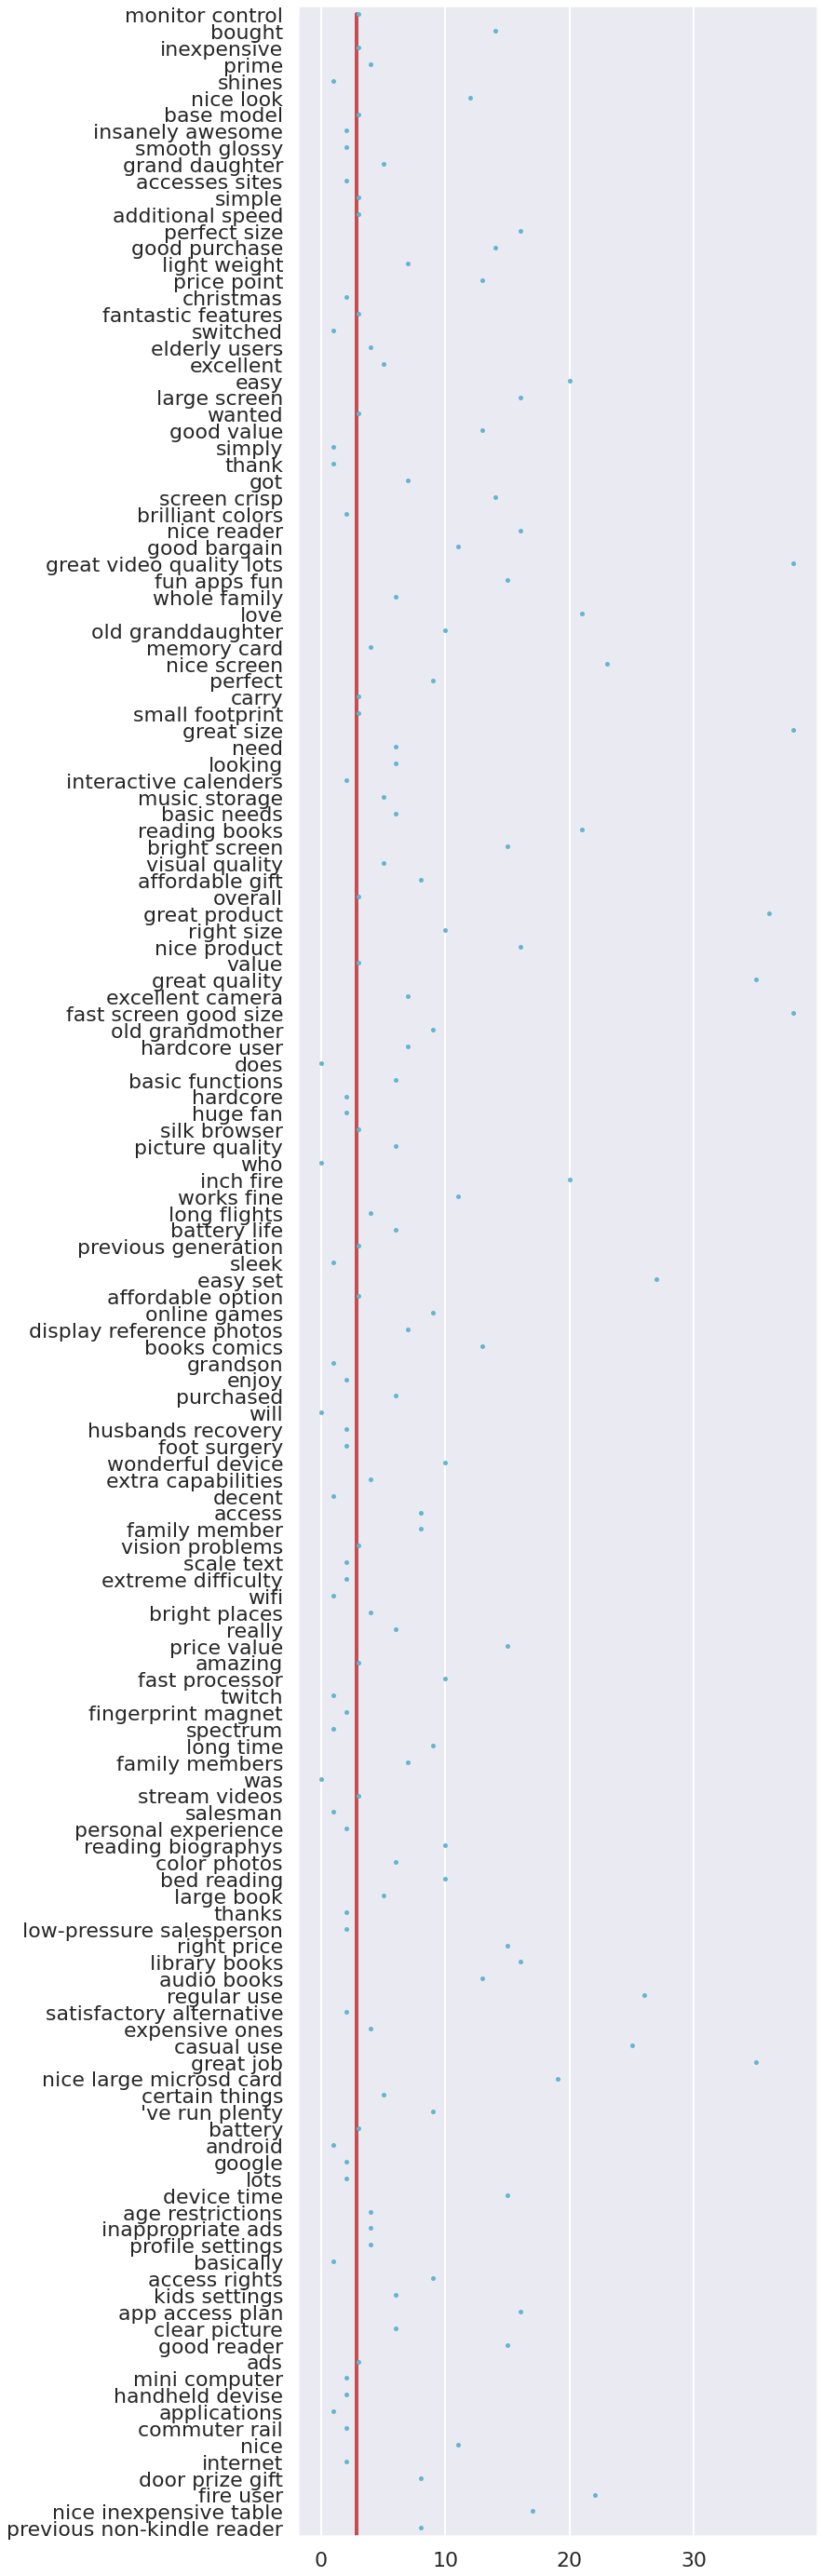

In [13]:
# Let's plot these feature occurences and draw the threshold line
sns.set()
sns.set_context("poster")
f, ax = plt.subplots(figsize=(10, 50))
sns.swarmplot(y=features, x=counts, color="c", ax=ax)
plt.plot([threshold, threshold], [0, len(features)], linewidth=4, color="r")

In [14]:
absa_list = dict()
# For each frequent feature
for f in frequent_features:
    # For each comment
    absa_list[f] = list()
    for comment in result:
        blob = TextBlob(comment)
        # For each sentence of the comment
        for sentence in blob.sentences:
            # Search for frequent feature 'f'
            q = '|'.join(f.split())
            if re.search(r'\w*(' + str(q) + ')\w*', str(sentence)):
                absa_list[f].append(sentence)

In [15]:
scores = list()
absa_scores = dict()
for k, v in absa_list.items():
    absa_scores[k] = list()
    for sent in v:
        score = sent.sentiment.polarity
        scores.append(score)
        absa_scores[k].append(score)


In [16]:
# Create data values for stripplot and boxplot
vals = dict()
vals["aspects"] = list()
vals["scores"] = list()
for k, v in absa_scores.items():
    for score in v:
        vals["aspects"].append(k)
        vals["scores"].append(score)

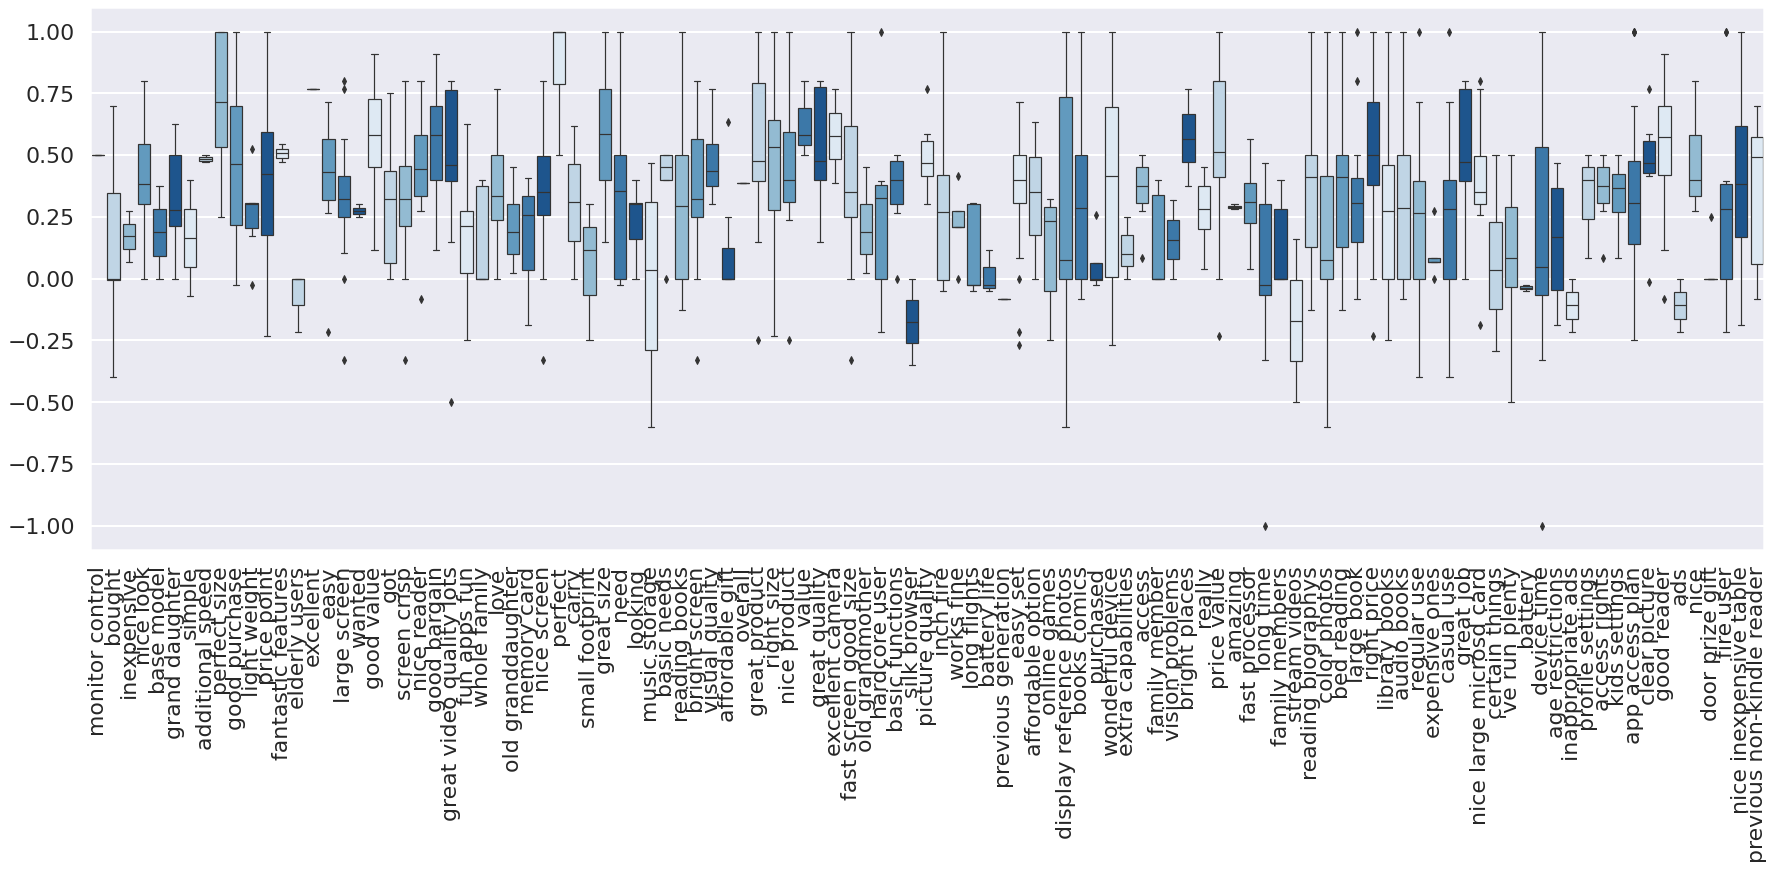

In [17]:
fig, ax1 = plt.subplots(figsize=(30, 10))

color = sns.color_palette("Blues", 6)
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=3) 
sns.boxplot(x="aspects", y="scores", data=vals, palette=color, ax=ax1)

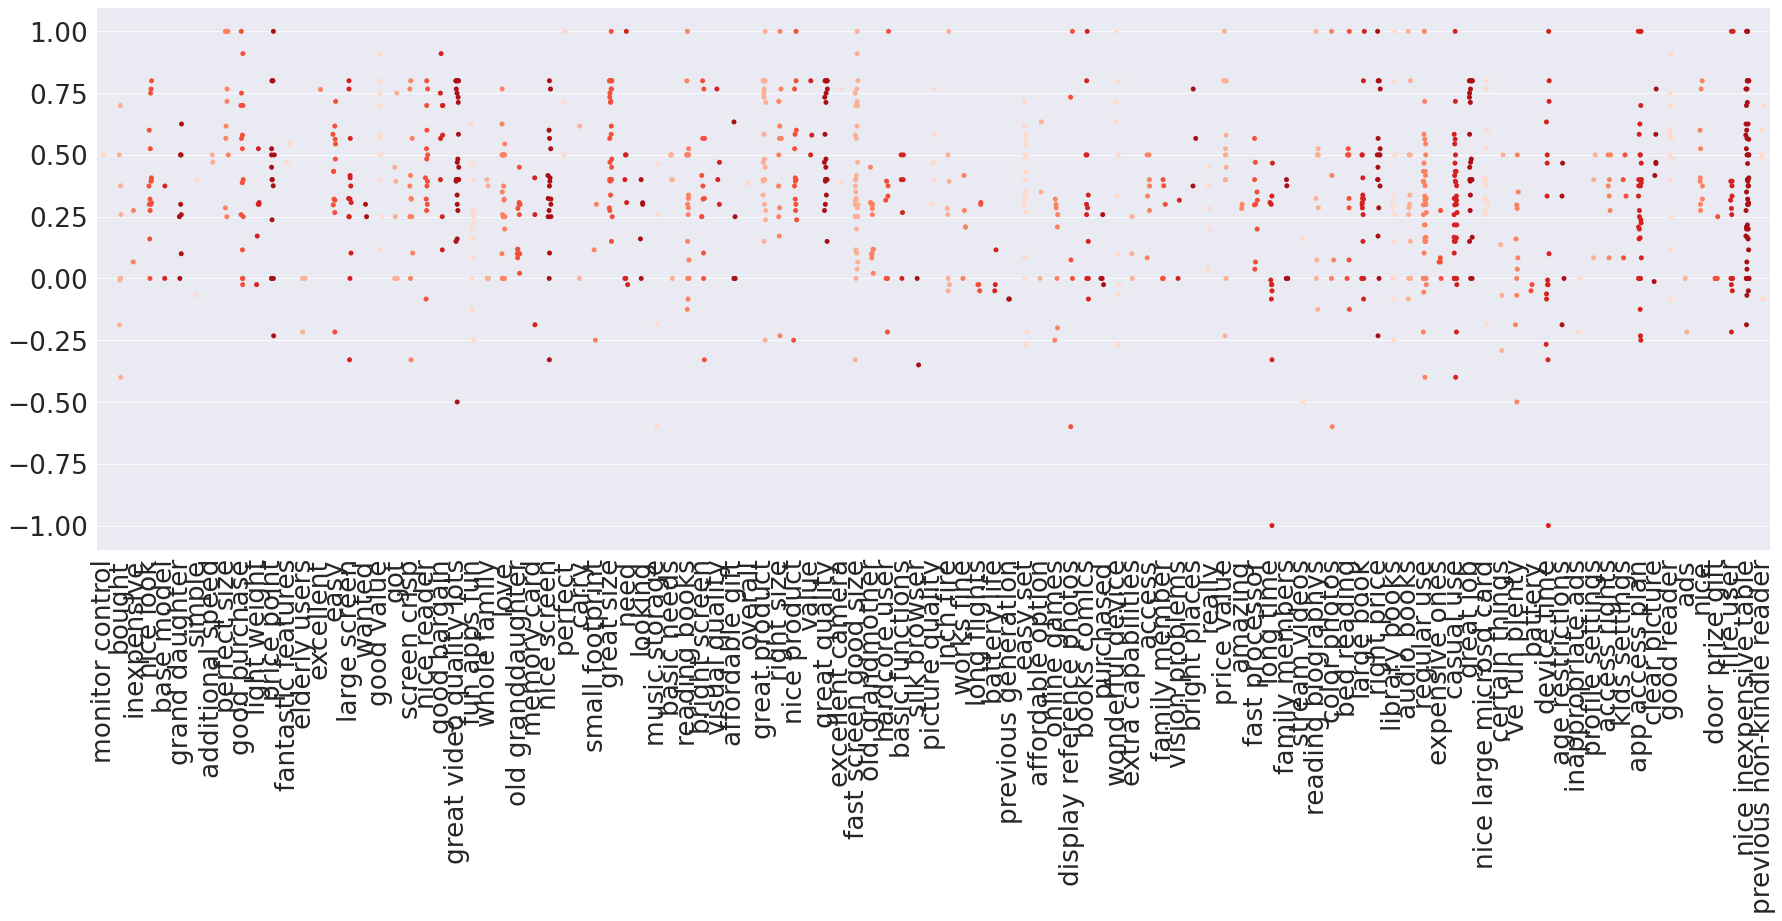

In [19]:
color = sns.color_palette("Reds", 6)
fig, ax1 = plt.subplots(figsize=(30, 10))
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=2) 
sns.stripplot(x="aspects", y="scores",data=vals, palette=color)